# Getting the returns of indexes

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
from scipy import stats

In [4]:
sns.set(rc={'figure.figsize':(11.7,8.27)})


In [3]:
tickers = ["^GSPC","^FTSE", "DAX", "^FCHI", "^IBEX", "^SSMI", "FTSEMIB.MI", "PSI20.LS", "^AEX"]

In [24]:
tickers_europe=["^FTSE", "DAX", "^FCHI", "^IBEX", "^SSMI", "FTSEMIB.MI", "PSI20.LS", "^AEX"]

In [7]:
indexes = yf.download(tickers, "2012-01-01", "2021-12-31")

[*********************100%***********************]  9 of 9 completed


In [8]:
europe_stoxx = yf.download("^STOXX", "2012-01-01", "2021-12-31")

[*********************100%***********************]  1 of 1 completed


In [9]:
europe_stoxx_close = europe_stoxx['Close']

In [10]:
indexes_close = indexes['Close']

In [5]:
european_prices = pd.read_csv('./european_market_original_clean.csv', index_col = "Date")
american_prices = pd.read_csv('./sp_500_original_clean.csv', index_col = "Date")

In [6]:
european_returns = european_prices.pct_change().iloc[1:]
american_returns = american_prices.pct_change().iloc[1:]

In [7]:
european_returns_flatten = european_returns.to_numpy().flatten()
american_returns_flatten = american_returns.to_numpy().flatten()

## Estadísticos descriptivos de los retornos

In [8]:
stats.describe(european_returns_flatten)

DescribeResult(nobs=656332, minmax=(0.063400000333786, 17135.0), mean=602.0174653274664, variance=1667213.3670355026, skewness=3.883982363668799, kurtosis=21.18530775129386)

In [9]:
stats.describe(american_returns_flatten)

DescribeResult(nobs=1160120, minmax=(1.6200000047683716, 5959.330078125), mean=107.58335413244343, variance=39531.847679023915, skewness=11.153278076141806, kurtosis=181.41432878729003)

### Test Jarque Bera

Test para probar si la curtosis y la asimetría de los datos son 0 y corresponden con una normal estándar

In [13]:
stats.jarque_bera(european_returns_flatten)

Jarque_beraResult(statistic=23313685.46910691, pvalue=0.0)

In [14]:
stats.jarque_bera(american_returns_flatten)

Jarque_beraResult(statistic=35213847.99516725, pvalue=0.0)

### Test Shapiro Wilk

In [15]:
shapiro(european_returns_flatten)[1]

/home/dum/miniconda3/lib/python3.9/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


0.0

In [16]:
shapiro(american_returns_flatten)[1]

0.0

## Densidades

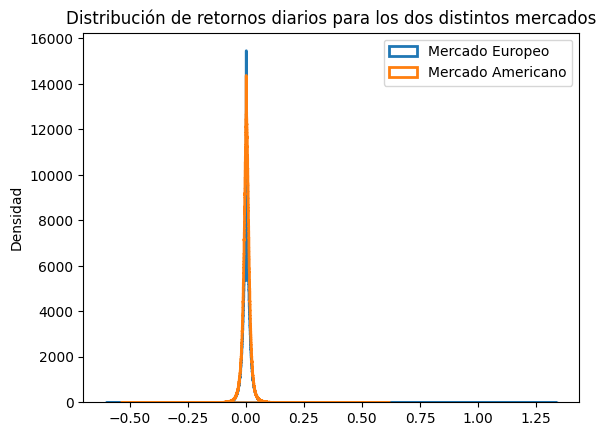

In [26]:
ax = sns.histplot(european_returns_flatten, bins='auto', alpha = 0, element="step", linewidth=2)
ax = sns.histplot(american_returns_flatten, bins='auto', alpha = 0, element="step", linewidth=2)
plt.legend(labels=['Mercado Europeo', 'Mercado Americano'])    
plt.title("Distribución de retornos diarios para los dos distintos mercados")
ax.set(ylabel="Densidad")
plt.show;

<function matplotlib.pyplot.show(close=None, block=None)>

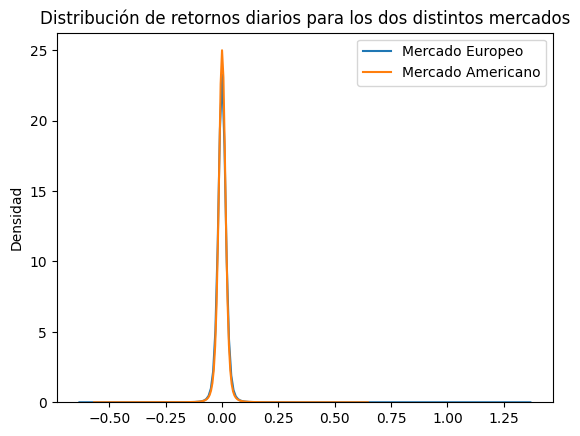

In [16]:
ax = sns.kdeplot(european_returns_flatten, bw_method=0.5, fill=False, alpha = 1)
ax = sns.kdeplot(american_returns_flatten, bw_method=0.5, fill=False, alpha = 1)
plt.legend(labels=['Mercado Europeo', 'Mercado Americano'])    
plt.title("Distribución de retornos diarios para los dos distintos mercados")
ax.set(ylabel="Densidad")
plt.show

NameError: name 'tickers_europe' is not defined

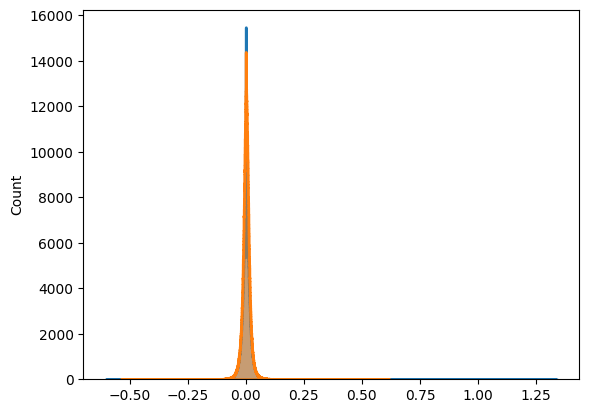

In [23]:
ax = sns.histplot(european_returns_flatten, bins='auto', alpha = 0.5, element="step", linewidth=2)
ax = sns.histplot(american_returns_flatten, bins='auto', alpha = 0.5, element="step", linewidth=2)

for index in tickers_europe:
    ax = sns.histplot(indexes_close[index],bins='auto', alpha = 0.5, element="step", linewidth=2)

plt.legend(labels=tickers_europe)    
plt.title("Distribución de retornos diarios para índices europeos")
ax.set(ylabel="Densidad")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

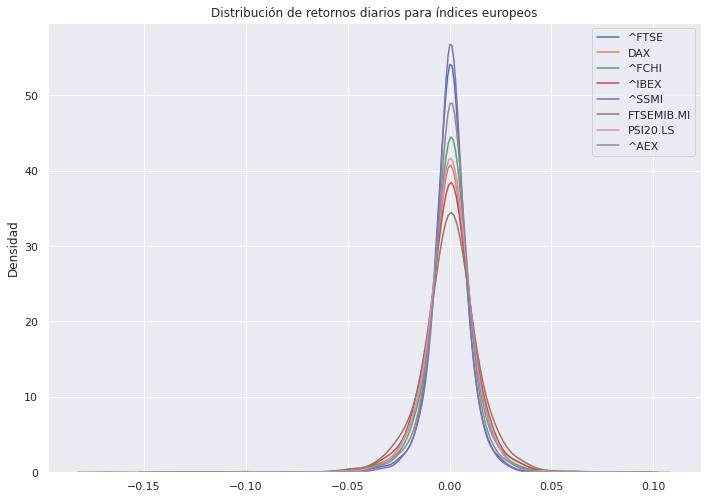

In [15]:
for index in tickers_europe:
    ax = sns.kdeplot(indexes_close[index].pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
plt.legend(labels=tickers_europe)    
plt.title("Distribución de retornos diarios para índices europeos")
ax.set(ylabel="Densidad")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

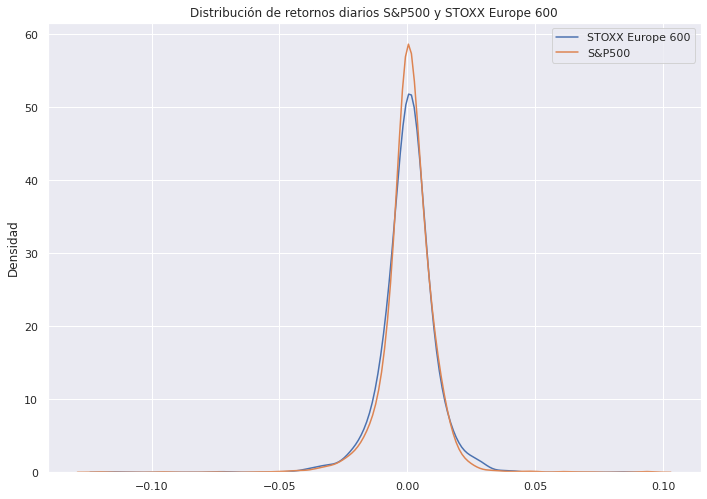

In [16]:
ax = sns.kdeplot(europe_stoxx_close.pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
ax = sns.kdeplot(indexes_close["^GSPC"].pct_change(periods = 1).dropna().values, bw_method=0.3, fill=False, alpha = 1)
plt.legend(labels=["STOXX Europe 600", "S&P500"])    
plt.title("Distribución de retornos diarios S&P500 y STOXX Europe 600")
ax.set(ylabel="Densidad")
plt.show

## Análisis de los retornos

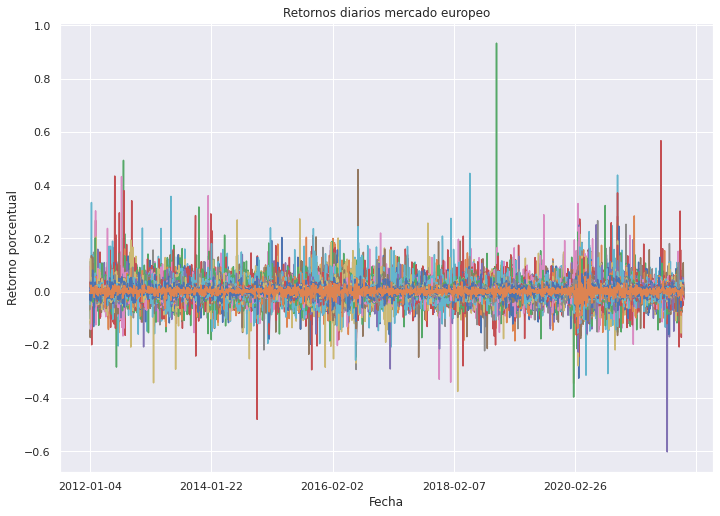

In [19]:
ax = european_returns.plot(legend = False, title ="Retornos diarios mercado europeo", ylabel="Retorno porcentual", xlabel="Fecha")

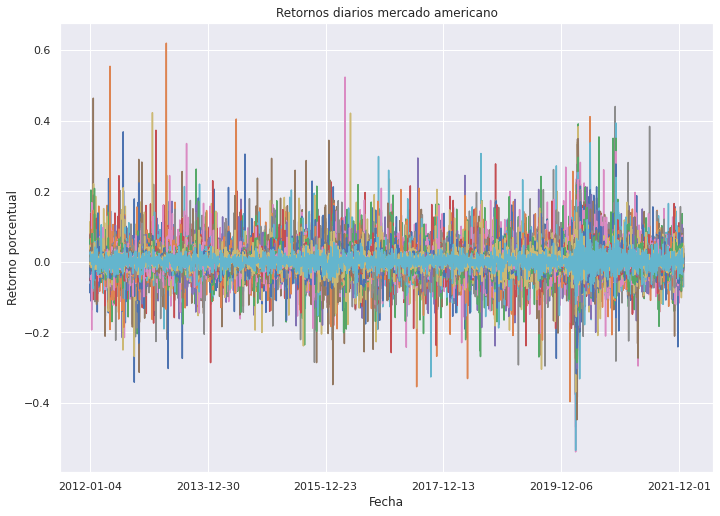

In [20]:
ax = american_returns.plot(legend = False, title ="Retornos diarios mercado americano", ylabel="Retorno porcentual", xlabel ="Fecha")

## Shapiro Wilk Test

In [153]:
shapiro(rs.dropna())[1]

3.6433760072445244e-44

In [155]:
shapiro(rsa.dropna())[1]

8.407790785948902e-45

In [21]:
shapiro_american = []
for item in american_returns:
    shapiro_american.append(shapiro(american_returns[item])[1])

In [167]:
(pd.Series(shapiro_american) > 0.05).sum()

0

<AxesSubplot:>

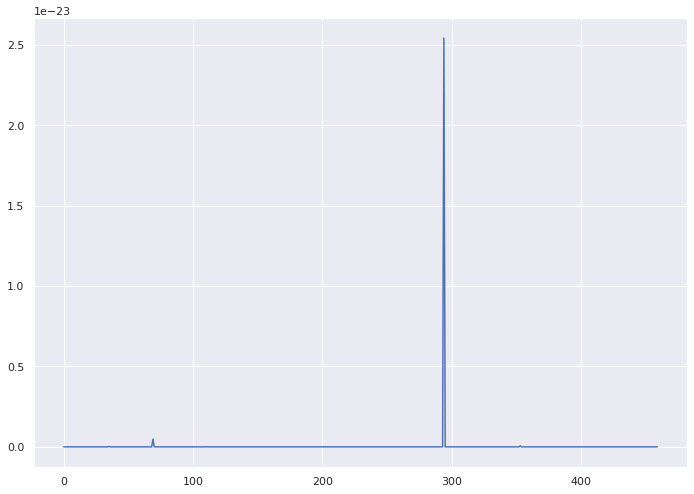

In [22]:
 pd.Series(shapiro_american)

In [32]:
shapiro_european = []
for item in european_returns:
    shapiro_european.append(shapiro(european_returns[item])[1])

In [169]:
(pd.Series(shapiro_european) > 0.05).sum()

0

<ipython-input-54-aba9cff31f56>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


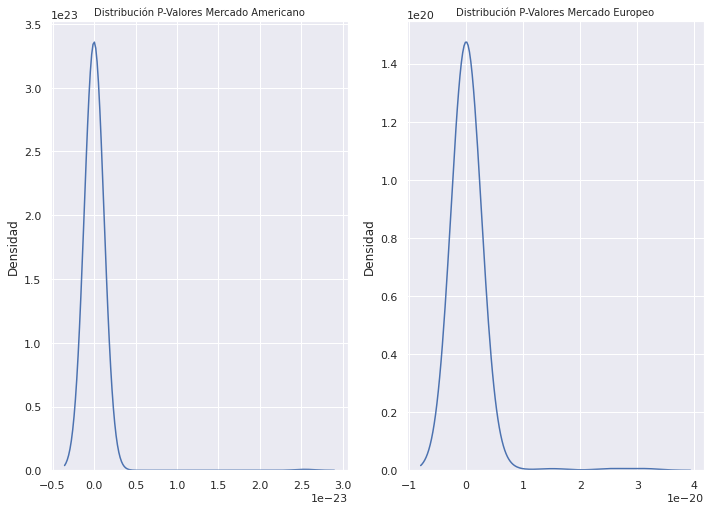

In [54]:
fig, ax =plt.subplots(1,2)
ax1= sns.kdeplot(pd.Series(shapiro_american), bw_method=1, fill=False, alpha = 1, ax = ax[0] )
ax2 = sns.kdeplot(pd.Series(shapiro_european), bw_method=1, fill=False, alpha = 1, ax = ax[1] )

ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
ax1.set_title("Distribución P-Valores Mercado Americano", fontsize=10)
ax2.set_title("Distribución P-Valores Mercado Europeo", fontsize=10)
fig.show()


## Augmented Dicky Fuller Test (Testing stationarity)

In [55]:
dickys_americano = []
for item in american_returns:
    dickys_americano.append(adfuller(american_returns[item], regression = "n", maxlag = 10)[1])

In [57]:
pd.Series(dickys_americano).sort_values()

332    0.000000e+00
119    0.000000e+00
292    0.000000e+00
117    0.000000e+00
116    0.000000e+00
           ...     
241    1.362319e-24
283    1.677059e-24
253    1.991604e-24
366    2.580892e-24
91     4.192056e-24
Length: 460, dtype: float64

In [58]:
(pd.Series(dickys_americano) > 0.05).sum()

0

In [60]:
dickys_europe = []
for item in european_returns:
    dickys_europe.append(adfuller(x = european_returns[item], regression="n", maxlag = 10)[1])

In [61]:
pd.Series(dickys_europe).sort_values()

0      0.000000e+00
165    0.000000e+00
166    0.000000e+00
168    0.000000e+00
169    0.000000e+00
           ...     
193    1.668725e-25
8      1.927139e-25
128    2.811647e-25
149    2.862097e-25
133    2.742026e-24
Length: 272, dtype: float64

In [132]:
rs = indexes_close["^GSPC"].apply(np.log).diff(1) 

<AxesSubplot:xlabel='Date'>

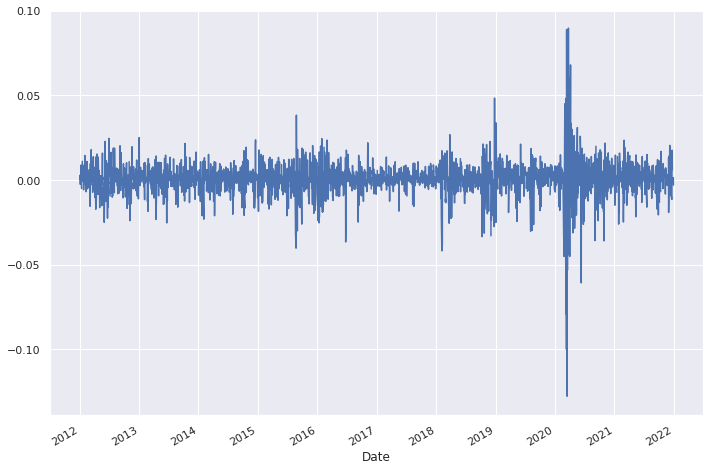

In [134]:
rs.plot()

In [135]:
rsa = indexes_close["^GSPC"].pct_change(periods = 1)

<AxesSubplot:xlabel='Date'>

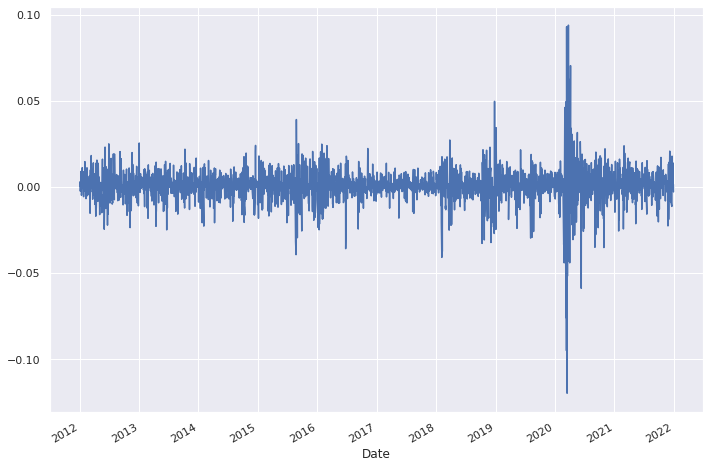

In [136]:
rsa.plot()

<ipython-input-62-c0a2218b9923>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


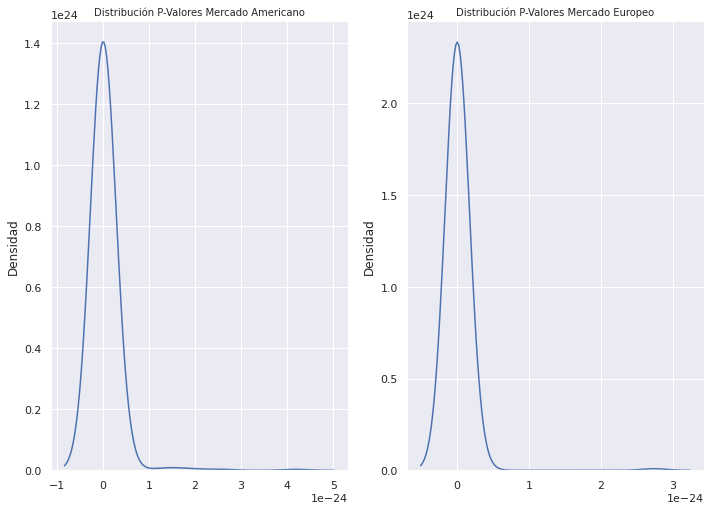

In [62]:
fig, ax =plt.subplots(1,2)
ax1= sns.kdeplot(pd.Series(dickys_americano), bw_method=1, fill=False, alpha = 1, ax = ax[0] )
ax2 = sns.kdeplot(pd.Series(dickys_europe), bw_method=1, fill=False, alpha = 1, ax = ax[1] )

ax1.set_ylabel("Densidad")
ax2.set_ylabel("Densidad")
ax1.set_title("Distribución P-Valores Mercado Americano", fontsize=10)
ax2.set_title("Distribución P-Valores Mercado Europeo", fontsize=10)
fig.show()


## Análisis de factores principales

<Axes: title={'center': 'Primer Componente del PCA de Mercado Europeo'}>

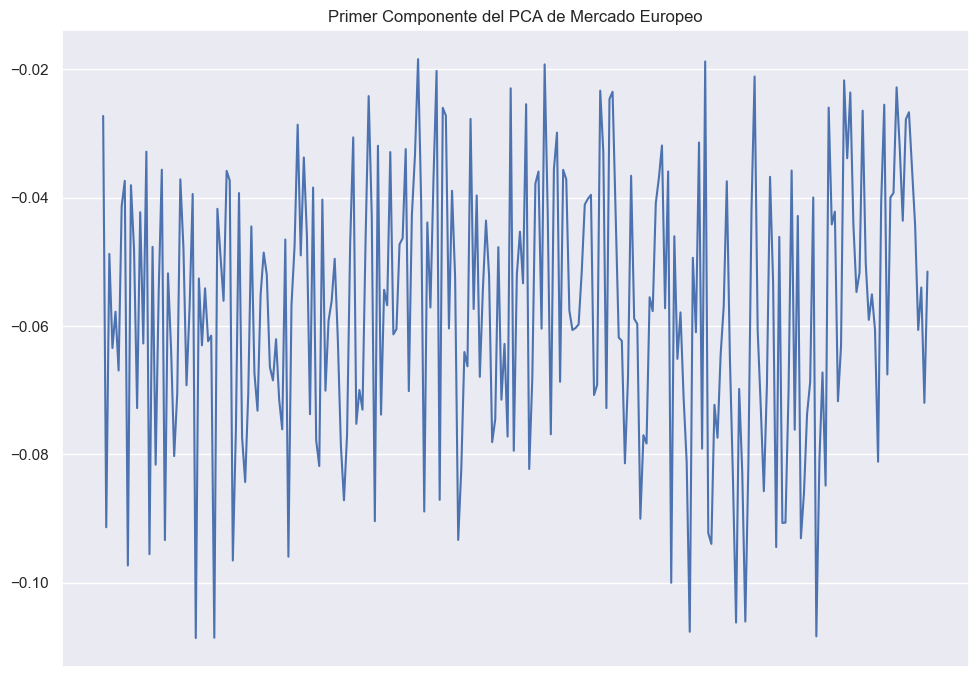

In [8]:
pca = PCA(1).fit(european_returns)
pc1 = pd.Series(index=european_returns.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='Primer Componente del PCA de Mercado Europeo')

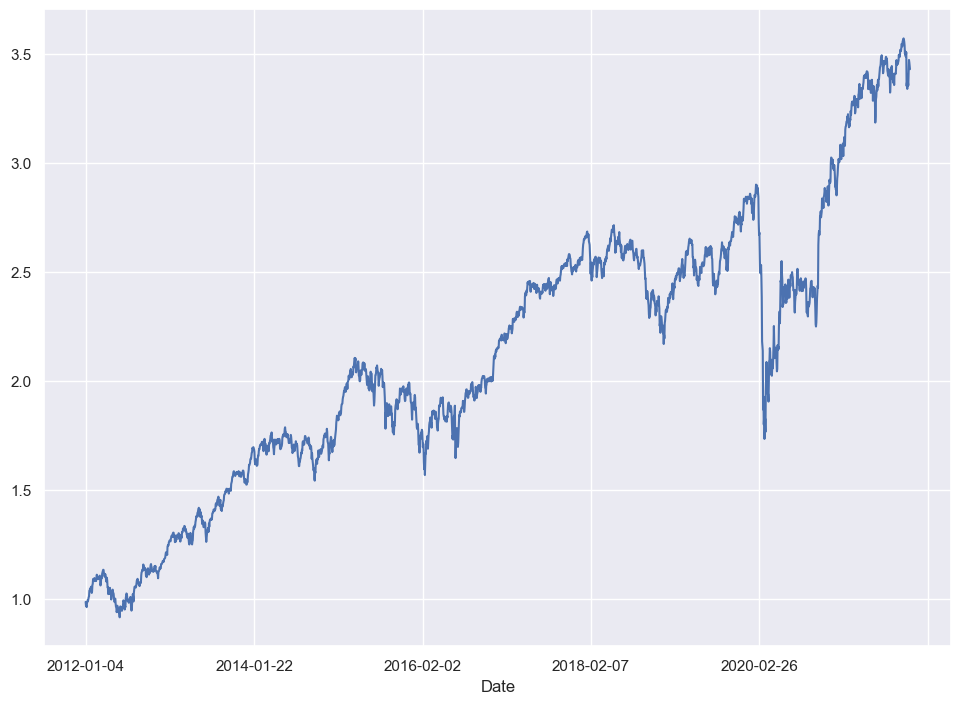

In [9]:
weights_europe = abs(pc1)/sum(abs(pc1))
myrs_europe = (weights_europe*european_returns).sum(1)
ax = myrs_europe.cumsum().apply(np.exp).plot()

<Axes: title={'center': 'Primer Componente del PCA de Mercado Americando'}>

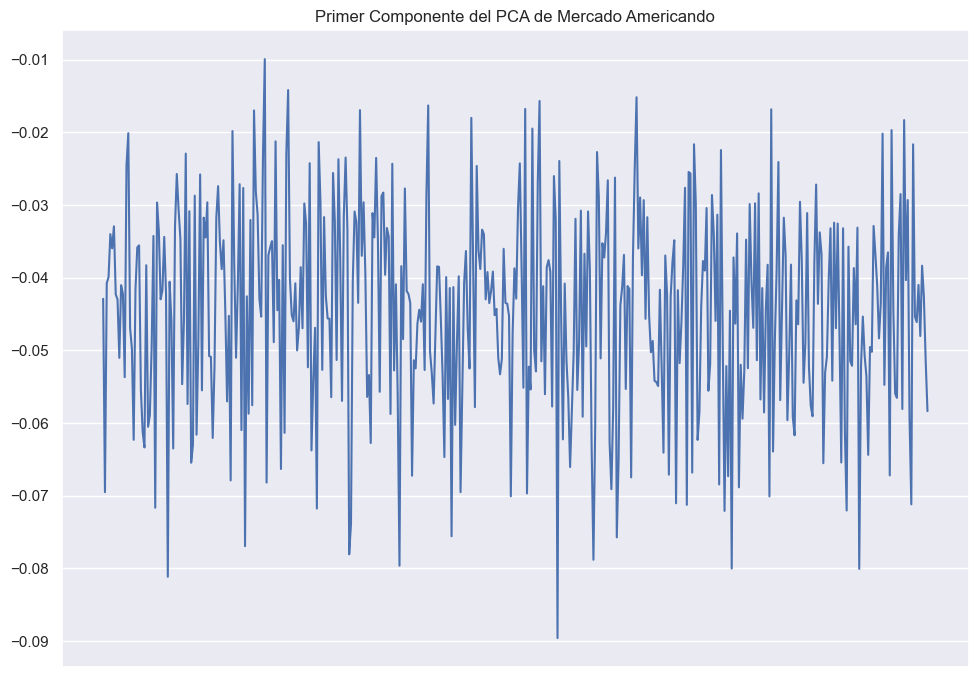

In [10]:
pca = PCA(1).fit(american_returns)
pc1 = pd.Series(index=american_returns.columns, data=pca.components_[0])
pc1.plot(xticks=[], title='Primer Componente del PCA de Mercado Americando')

<Axes: xlabel='Date'>

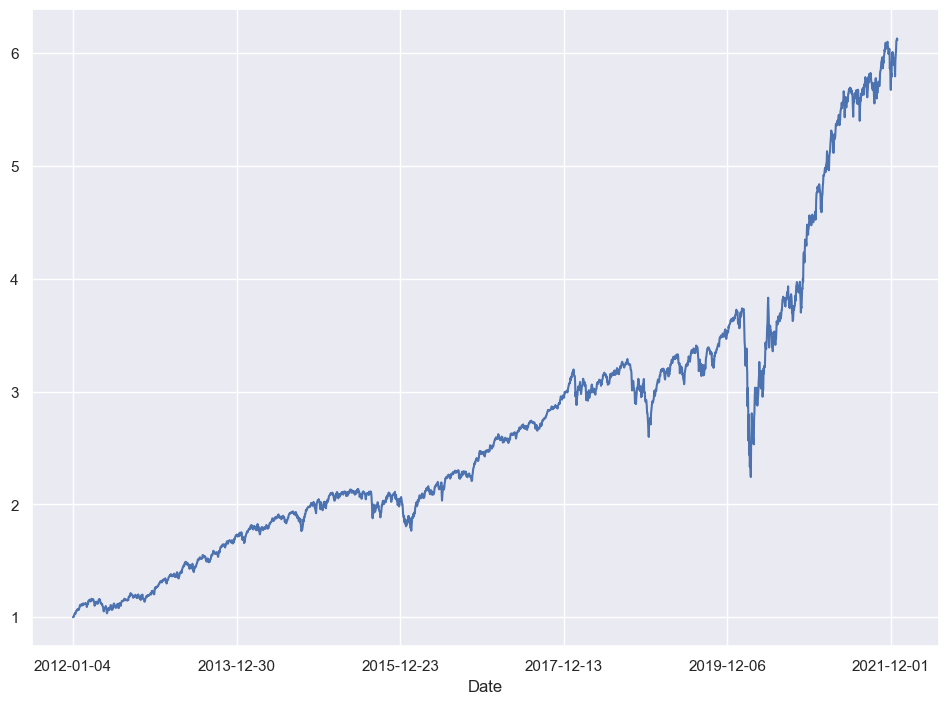

In [11]:
weights_american = abs(pc1)/sum(abs(pc1))
myrs_american = (weights_american*american_returns).sum(1)
myrs_american.cumsum().apply(np.exp).plot()

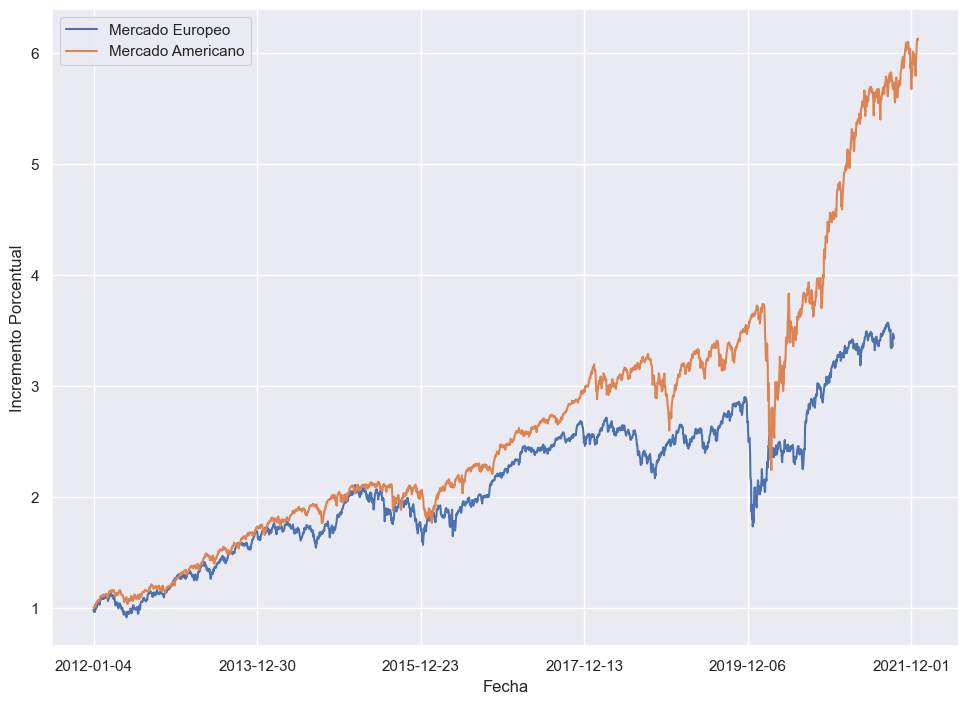

In [13]:
ax = myrs_europe.cumsum().apply(np.exp).plot()
ax = myrs_american.cumsum().apply(np.exp).plot()
# Le quito el título por que el prof dice que no se ponen títulos en las gráficas de la tesis
# IMAGE [TESIS]
#plt.title("Simulación de rendimiento de portafolio de pesos iguales utilizando el primer componente principal")
ax.set_xlabel("Fecha")
ax.set_ylabel("Incremento Porcentual")
plt.legend(["Mercado Europeo", "Mercado Americano"])

Ver donde están los mínimos para ver los rezagos de tiempo entre los dos mercados. Se tiene un rezago de 6 días.

In [34]:
myrs_europe.cumsum().apply(np.exp)[myrs_europe.cumsum().apply(np.exp) == myrs_europe.cumsum().apply(np.exp)["2018-12-01":"2020-12-01"].min()]

Date
2020-03-18    1.579623
dtype: float64

In [35]:
myrs_american.cumsum().apply(np.exp)[myrs_american.cumsum().apply(np.exp) == myrs_american.cumsum().apply(np.exp)["2018-12-01":"2020-12-01"].min()]

Date
2020-03-23    2.243499
dtype: float64

## Análisis de medias y SD

In [174]:
medias_am = american_returns.mean()
medias_eu = european_returns.mean()

In [182]:
medias =pd.DataFrame(data ={"Mercado Americano": medias_am, "Mercado Europeo": medias_eu})

Text(0.5, 1.0, 'Medias de Retornos de los Componentes de cada Mercado')

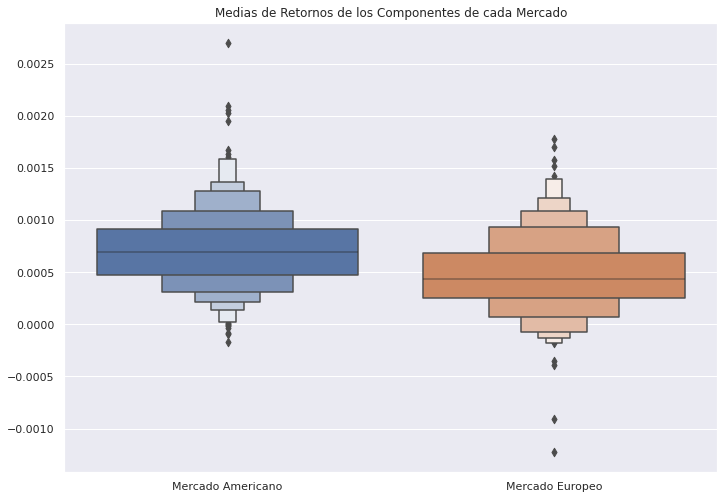

In [185]:
ax = sns.boxenplot(data = medias)
plt.title("Medias de Retornos de los Componentes de cada Mercado")

In [187]:
std_am = american_returns.std()
std_eu = european_returns.std()

In [188]:
stds =pd.DataFrame(data ={"Mercado Americano": std_am, "Mercado Europeo": std_eu})

Text(0.5, 1.0, 'Desviaciones Estándar de Retornos de los Componentes de cada Mercado')

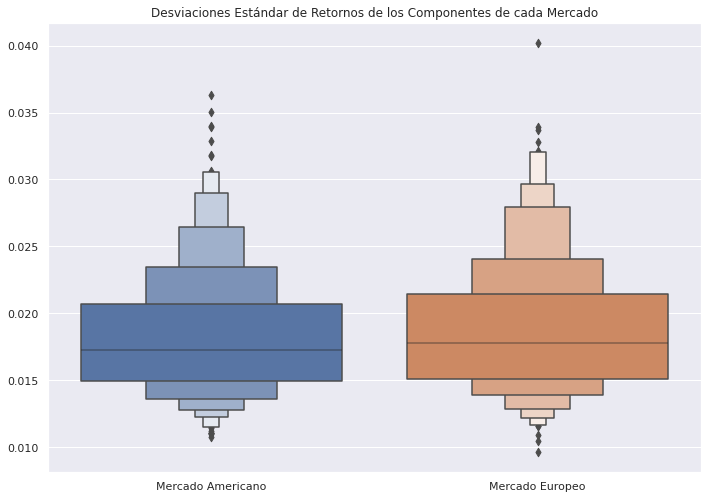

In [189]:
ax = sns.boxenplot(data = stds)
plt.title("Desviaciones Estándar de Retornos de los Componentes de cada Mercado")